In [ ]:
# conda activate output_diags

In [2]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
# import earthpy as et

In [3]:
filedir = '/storage/shared/oceanparcels/output_data/data_LauraGN/WOC/Sanchi_Confidential/'
# Local path: '/Users/Gomez023/Documents/postdoc_docs/Projects/WOC_proj/Oil/Duarte_Sanchi_spill/'

In [5]:
# import shapefile using geopandas
sjer_plot_locations = gpd.read_file(filedir + 'CONFIDENTIAL_slick_merged.shp')


In [6]:
# view  the top 6 lines of attribute table of data
sjer_plot_locations.head(6)

,fid,image,order,layer,satellite,geometry
0,1.0,19.01_crop_modified,7,slick_19.01_crop_modified,Chinese_photo,"POLYGON ((125.85835 28.38712, 125.85964 28.390..."
1,2.0,19.01_crop_modified,7,slick_19.01_crop_modified,Chinese_photo,"POLYGON ((126.33088 28.54524, 126.32940 28.548..."
2,3.0,20.01_crop_modified,10,slick_20.01_crop_modified,Chinese_photo,"POLYGON ((125.93665 28.37381, 125.93917 28.373..."
3,4.0,20.01_crop_modified,10,slick_20.01_crop_modified,Chinese_photo,"POLYGON ((126.36238 28.73500, 126.36690 28.735..."
4,5.0,20.01_crop_modified,10,slick_20.01_crop_modified,Chinese_photo,"POLYGON ((126.60128 28.48790, 126.58182 28.488..."
5,6.0,15.01 PM_crop_modified,1,slick_Jan 15_15.01 PM_crop_modified_T1718_loca...,Chinese_photo,"POLYGON ((125.92267 28.44151, 125.92095 28.442..."


In [7]:
type(sjer_plot_locations)


geopandas.geodataframe.GeoDataFrame

In [8]:
# view the spatial extent
sjer_plot_locations.total_bounds

array([125.85835158,  28.29649379, 127.88859039,  29.56978773])

In [9]:
sjer_plot_locations.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
sjer_plot_locations.geom_type


0     Polygon
1     Polygon
2     Polygon
3     Polygon
4     Polygon
       ...   
58    Polygon
59    Polygon
60    Polygon
61    Polygon
62       None
Length: 63, dtype: object

In [11]:
sjer_plot_locations.shape


(63, 6)

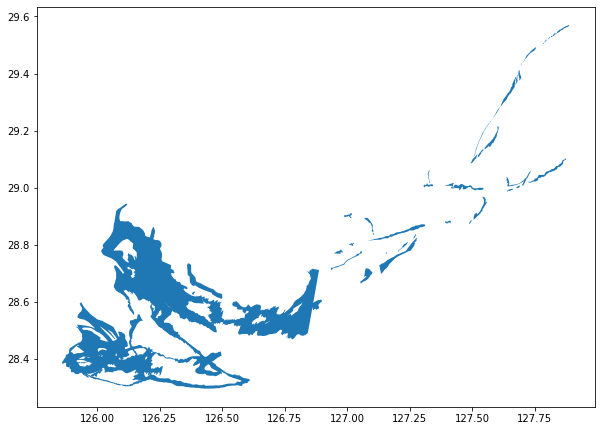

In [12]:
# plot the data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))
sjer_plot_locations.plot(ax=ax)
plt.show()

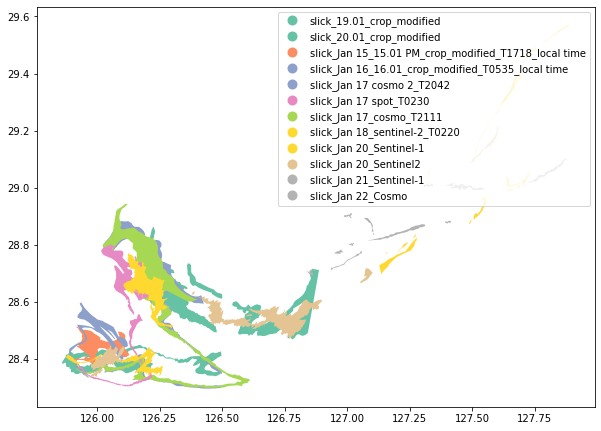

In [13]:
fig, ax = plt.subplots(figsize = (10,10))

# quickly plot the data adding a legend
sjer_plot_locations.plot(column='layer', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=45, 
                         cmap="Set2", ax=ax);

# Loading footprint data too:

In [16]:
# import crop boundary
sjer_crop_extent = gpd.read_file(filedir + "CONFIDENTIAL_merged_footprints.shp")

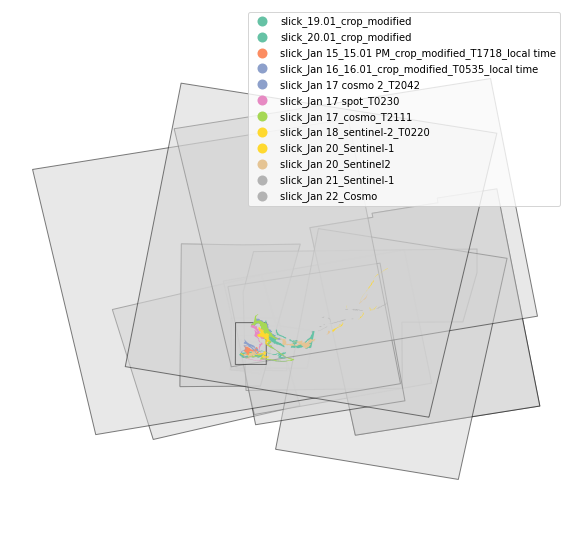

In [17]:
fig, ax = plt.subplots(figsize = (10, 10))

# first setup the plot using the crop_extent layer as the base layer 
sjer_crop_extent.plot(color='lightgrey',
                      edgecolor = 'black',
                      ax = ax,
                      alpha=.5)
# then add another layer using geopandas syntax .plot, and calling the ax variable as the axis argument
sjer_plot_locations.plot(ax=ax, 
                         column='layer',
                         categorical=True,
                         marker='*',
                         legend=True,
                         markersize=50, 
                         cmap='Set2')
# add a title to the plot
# ax.set_title('SJER Plot Locations\nMadera County, CA')
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [18]:
# view the coordinate reference system of both layers 
print(sjer_plot_locations.crs)

epsg:4326


# Testing different colormaps:

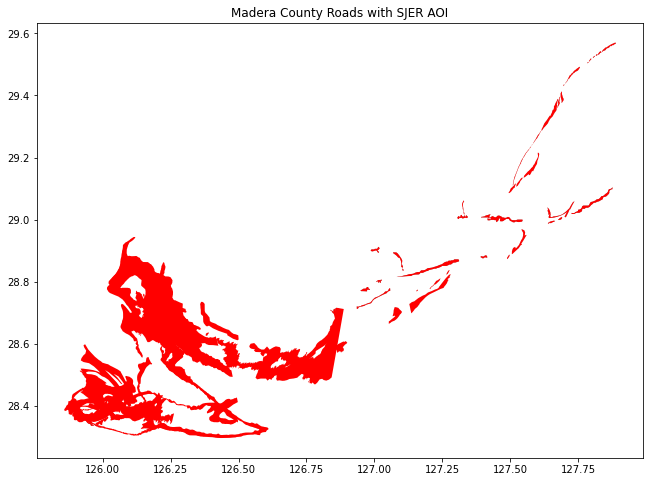

In [20]:
# create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# add roads to the plot
sjer_plot_locations.plot(cmap='Greys', ax=ax, alpha=.5)

# add the reprojected SJER boundary to the plot
sjer_plot_locations.plot(ax=ax, markersize=10, color='r')

# add a title for the plot
ax.set_title("Madera County Roads with SJER AOI");

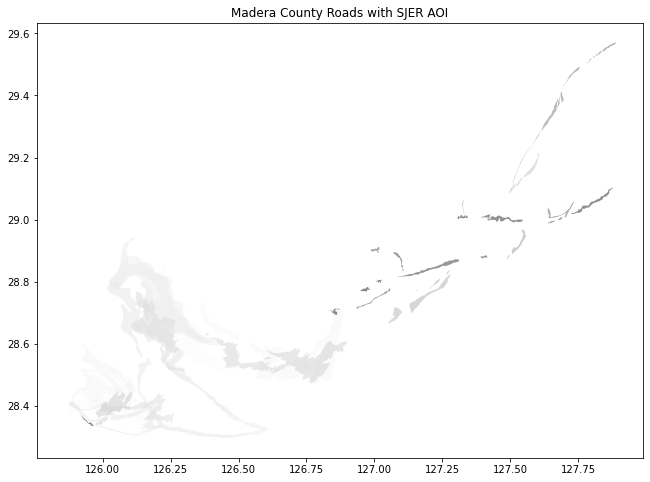

In [21]:
# create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# add roads to the plot
sjer_plot_locations.plot(cmap='Greys', ax=ax, alpha=.5)

# add a title for the plot
ax.set_title("Madera County Roads with SJER AOI");

# Selecting one layer:

In [22]:
test_gpdf = sjer_plot_locations.copy()
test_gpdf = test_gpdf[(test_gpdf.layer=='slick_19.01_crop_modified')]


In [23]:
test_gpdf

,fid,image,order,layer,satellite,geometry
0,1.0,19.01_crop_modified,7,slick_19.01_crop_modified,Chinese_photo,"POLYGON ((125.85835 28.38712, 125.85964 28.390..."
1,2.0,19.01_crop_modified,7,slick_19.01_crop_modified,Chinese_photo,"POLYGON ((126.33088 28.54524, 126.32940 28.548..."


In [24]:
sjer_plot_locations.layer.unique()

array(['slick_19.01_crop_modified', 'slick_20.01_crop_modified',
       'slick_Jan 15_15.01 PM_crop_modified_T1718_local time',
       'slick_Jan 16_16.01_crop_modified_T0535_local time',
       'slick_Jan 17 cosmo 2_T2042', 'slick_Jan 17_cosmo_T2111',
       'slick_Jan 17 spot_T0230', 'slick_Jan 18_sentinel-2_T0220',
       'slick_Jan 20_Sentinel2', 'slick_Jan 20_Sentinel-1',
       'slick_Jan 21_Sentinel-1', 'slick_Jan 22_Cosmo'], dtype=object)

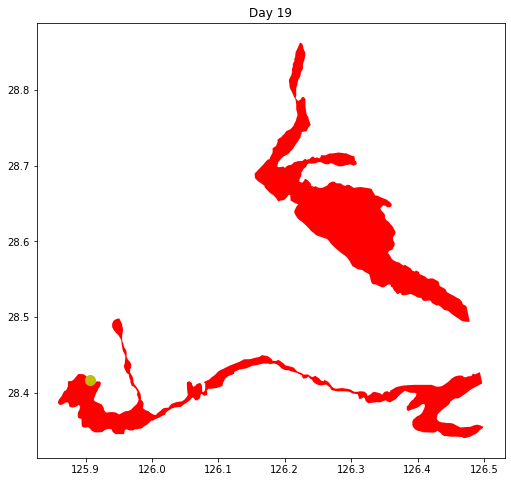

In [26]:

# create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# add roads to the plot

# add the reprojected SJER boundary to the plot
test_gpdf.plot(ax=ax, markersize=10, color='r');
ax.scatter(125.906860, 28.417036, c='y', s=100)

# add a title for the plot
ax.set_title("Day 19");

# Plotting per day:

In [27]:
sjer_plot_locations.layer.unique()

array(['slick_19.01_crop_modified', 'slick_20.01_crop_modified',
       'slick_Jan 15_15.01 PM_crop_modified_T1718_local time',
       'slick_Jan 16_16.01_crop_modified_T0535_local time',
       'slick_Jan 17 cosmo 2_T2042', 'slick_Jan 17_cosmo_T2111',
       'slick_Jan 17 spot_T0230', 'slick_Jan 18_sentinel-2_T0220',
       'slick_Jan 20_Sentinel2', 'slick_Jan 20_Sentinel-1',
       'slick_Jan 21_Sentinel-1', 'slick_Jan 22_Cosmo'], dtype=object)

In [28]:
gpdf_15 = sjer_plot_locations.copy()
gpdf_15 = gpdf_15[(gpdf_15.layer=='slick_Jan 15_15.01 PM_crop_modified_T1718_local time')]

gpdf_16 = sjer_plot_locations.copy()
gpdf_16 = gpdf_16[(gpdf_16.layer=='slick_Jan 16_16.01_crop_modified_T0535_local time')]

gpdf_19 = sjer_plot_locations.copy()
gpdf_19 = gpdf_19[(gpdf_19.layer=='slick_19.01_crop_modified')]

gpdf_17_1 = sjer_plot_locations.copy()
gpdf_17_1 = gpdf_17_1[(gpdf_17_1.layer=='slick_Jan 17 cosmo 2_T2042')]

gpdf_17_2 = sjer_plot_locations.copy()
gpdf_17_2 = gpdf_17_2[(gpdf_17_2.layer=='slick_Jan 17_cosmo_T2111')]

gpdf_17_3 = sjer_plot_locations.copy()
gpdf_17_3 = gpdf_17_3[(gpdf_17_3.layer=='slick_Jan 17 spot_T0230')]

gpdf_18 = sjer_plot_locations.copy()
gpdf_18 = gpdf_18[(gpdf_18.layer=='slick_Jan 18_sentinel-2_T0220')]

gpdf_20_1 = sjer_plot_locations.copy()
gpdf_20_1 = gpdf_20_1[(gpdf_20_1.layer=='slick_20.01_crop_modified')]

gpdf_20_2 = sjer_plot_locations.copy()
gpdf_20_2 = gpdf_20_2[(gpdf_20_2.layer=='slick_Jan 20_Sentinel2')]

gpdf_20_3 = sjer_plot_locations.copy()
gpdf_20_3 = gpdf_20_3[(gpdf_20_3.layer=='slick_Jan 20_Sentinel-1')]

gpdf_21 = sjer_plot_locations.copy()
gpdf_21 = gpdf_21[(gpdf_21.layer=='slick_Jan 21_Sentinel-1')]

gpdf_22 = sjer_plot_locations.copy()
gpdf_22 = gpdf_22[(gpdf_22.layer=='slick_Jan 22_Cosmo')]
       

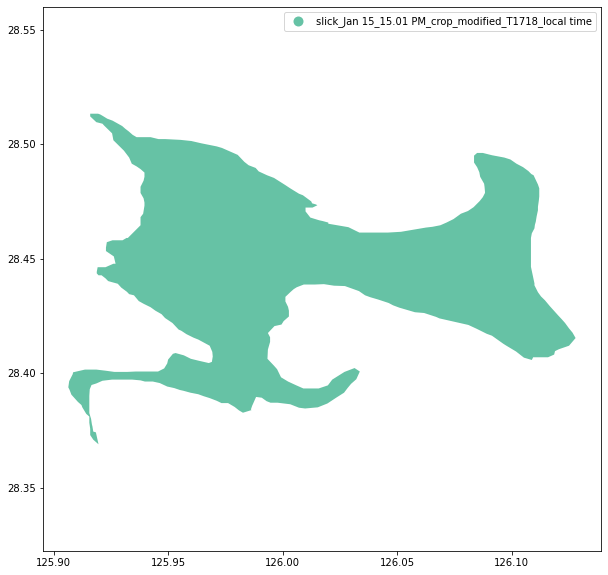

In [30]:
fig, ax = plt.subplots(figsize = (10,10))

# quickly plot the data adding a legend
gpdf_15.plot(column='layer', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=45, 
                         cmap="Set2", ax=ax);
# ax.scatter(lons_list, lats_list, c='k', s=80)

# ax.set_axis_off()
plt.axis('equal')
plt.show()